In [1]:
from fastai.text import *
from fastai.datasets import *
from pathlib import Path
import pandas as pd
from fastai.metrics import *
from fastai.train import *
from fastai.vision import *
from fastai.imports import nn, torch
from sklearn import metrics
from fastai.callbacks import *
from fastai.basic_train import get_preds

import sklearn.metrics
import datetime
torch.cuda.set_device(3)

import fastai
fastai.__version__

'1.0.29.dev0'

In [2]:
EX_PA = Path('/mnt/data/group07/johannes/ynacc_proc/replicate/lmmodels2')

In [3]:
data_lm = TextLMDataBunch.load(EX_PA)

In [4]:
learn = language_model_learner(data_lm, drop_mult=0.2).load(EX_PA/"models"/"2018_11_21_12_55_24_022251")

In [5]:
learn.unfreeze()

In [10]:
# learn.lr_find()
learn.lr_find(start_lr=1e-15, end_lr=1e-2, num_it=1000)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


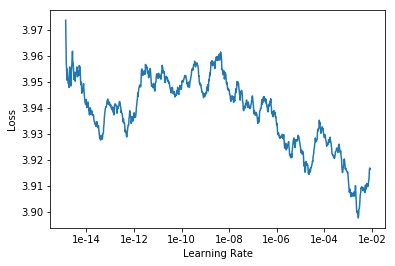

In [11]:
learn.recorder.plot()

In [13]:
lr = 1e-4

In [14]:
learn.fit_one_cycle(1, [lr / 2.6*3, lr / 2.6*2, lr / 2.6, lr])

Total time: 05:23
epoch  train_loss  valid_loss  accuracy
1      3.871703    3.872188    0.281689  (05:23)



## 1      4.109582    4.304508    0.257547  (08:11)

# 1      4.169057    4.333825    0.254068  (08:12)
learn.fit_one_cycle(1, slice(1e-5, 1e-4))

# learn.fit_one_cycle(1, [lr / 2.6**3, lr / 2.6**2, lr / 2.6, lr])

executed in 8m 15s, finished 19:22:40 2018-11-11

Total time: 08:15
epoch  train_loss  valid_loss  accuracy
1      4.239848    4.370053    0.251408  (08:15)



In [16]:
torch.

TypeError: Device() received an invalid combination of arguments - got (), but expected one of:
 * (torch.device device)
 * (str type, int index)


In [23]:
torch.cuda.get_device_name(2)

'GeForce GTX 1080 Ti'